In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import util
import skimage.io as io
from skimage import exposure

import sys
sys.path.append('../src')
from img_display import display, display_hist

In [55]:
def display(im3d, save_fig,step):
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 14))

    vmin = im3d.min()
    vmax = im3d.max()
    hour=0
    
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap="gray", vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_title(str(hour)+" hour")
        ax.set_yticks([])
        frame=hour+step
        hour=hour+1
    fig.savefig("../results/for_presentation/"+save_fig,bbox_inch='tight')

def display_hist(im3d, save_fig, step):
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 14))
    hour=0
    
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.hist(image.ravel(),bins=256)
        ax.set_title(str(hour)+" hour")
        ax.set_ylim([0,300000])
        frame=hour+step
        ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))
        hour=hour+1
         
    fig.savefig("../results/for_presentation/"+save_fig)
    
def Plot_layer_time(img,Layer,CenterX,Step,plot_label):
    """
    cut and display  defined layer across time frames
    
    input: 
        img:     image
        Layer:   hight of the layer in px
        CenterY: y coordinats of the center of the layer
        Step:    number frames per hour
        plot_label: str title of the plot
    
    """
    NumFrames=img.shape[0]
    TimeFrame=range(0,NumFrames,Step)
    NumLayers=len(TimeFrame)
    
    ImgLayerStack=np.zeros([img.shape[1],NumLayers*Layer])
    Interval=np.array([0,Layer])
    
    plt.figure(figsize=(20,20))
    
    for i in TimeFrame:
        cut=img[i,:,CenterX-int(Layer/2):CenterX+int(Layer/2)].copy()
        ImgLayerStack[:,Interval[0]:Interval[1]]=cut
        #exposure.equalize_adapthist(cut,clip_limit=0.03)
        Interval=Interval+Layer
        
    
    plt.figure(figsize=(20,20))
    plt.imshow(ImgLayerStack,cmap=plt.cm.gray)
    
    # put hour label to the plot
    count=1
    text_x_coord=range(int(Layer/2),NumLayers*Layer,Layer)
    labels=[str(i)+'hr' for i in range(NumLayers)]
    
    print(text_x_coord)
    plt.xticks(text_x_coord, labels)
    plt.yticks([])
    plt.subplots_adjust(bottom=0.15)
    
    plt.title(plot_label)
    plt.savefig("../results/for_presentation/"+plot_label+".png",bbox_inches='tight')

In [13]:
images=io.imread("../data/supplementaryMovie5_ancestor_ALI_original.tiff")

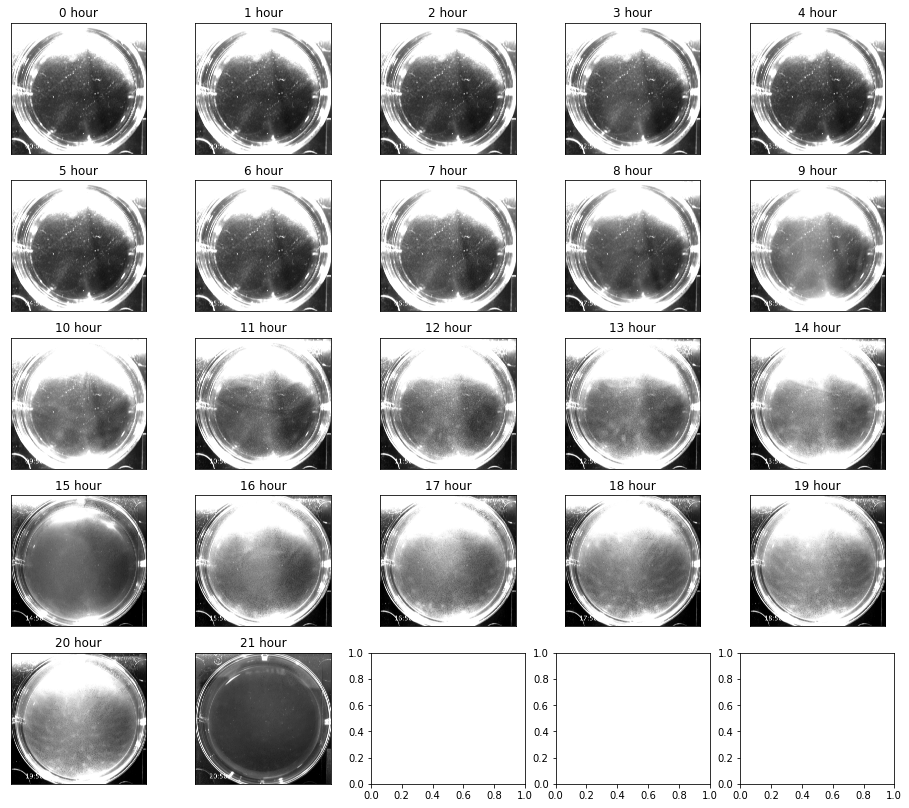

In [3]:
display(images, "Maxime's_experiment_overview",step=6)


In [4]:
def rescale_per_frame(img):
    vmin, vmax = np.percentile(img, q=(0.001, 95))
    #print(vmin, vmax)
    img_scaled = exposure.rescale_intensity(img,in_range=(vmin, vmax))
    return img_scaled

img_rescaled=np.zeros_like(images)
for frame in range(images.shape[0]):
    #print(frame)
    img_rescaled[frame,:,:] =rescale_per_frame(images[frame,:,:])


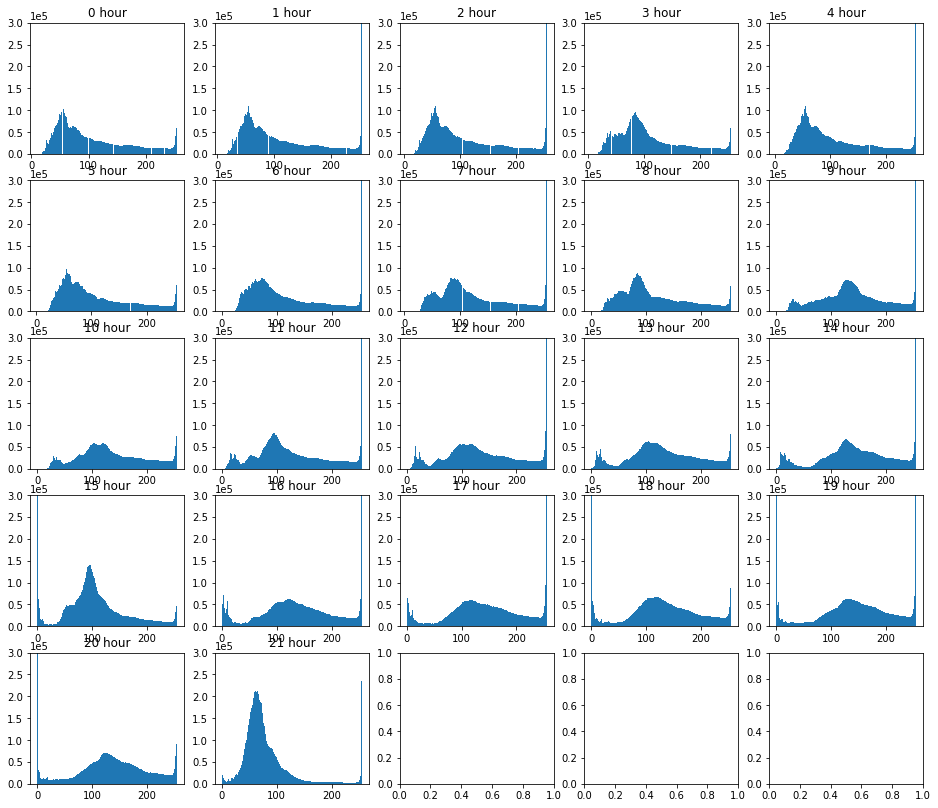

In [6]:
display_hist(images,"Maxime's_experiment_hist_overview",step=6)

range(100, 4400, 200)


<Figure size 1440x1440 with 0 Axes>

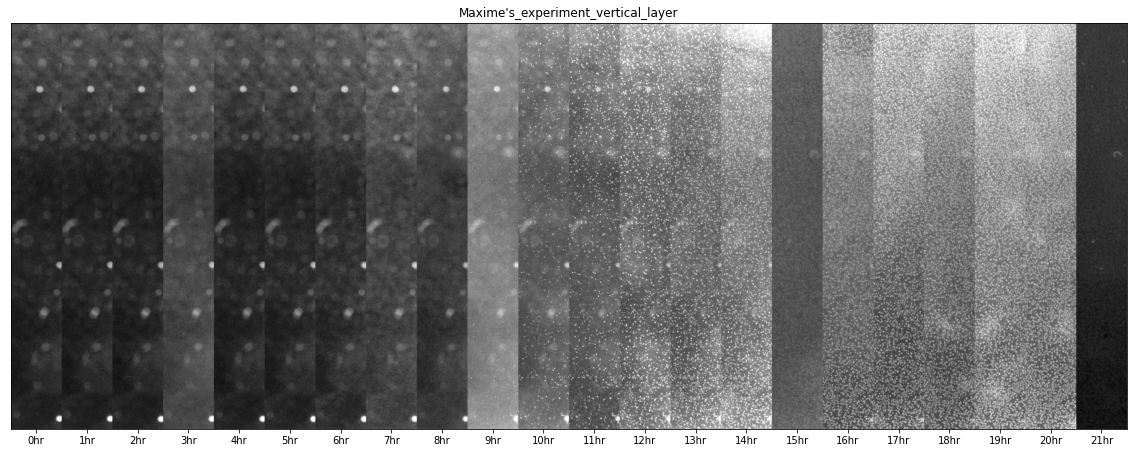

In [56]:
Plot_layer_time(images[:,1200:2800,:],200,1700,6,"Maxime's_experiment_vertical_layer")